In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize  # Import the minimize function


In [26]:
# Define your unimodal function
def my_fun(x):
    return ((x + 5) ** 2 + 2)

In [27]:
x_data = np.linspace(-20.0, 5.0, 200)
y_data = my_fun(x_data)

In [28]:
def quadratic_function(a, b, c, x):
    return a * x**2 + b * x + c

# Define the objective function for quadratic fit
def objective(params, x, y):
    a, b, c = params
    return np.sum((quadratic_function(a, b, c, x) - y)**2)

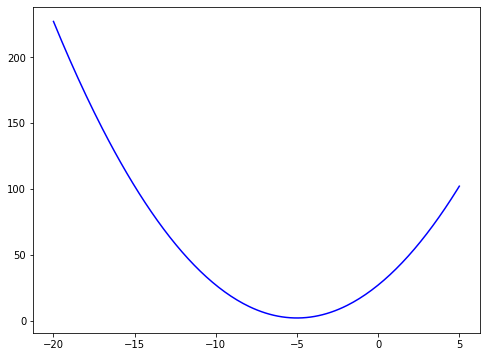

In [35]:
initial_guess = [1, 1, 1]

# Define the search range
search_range = (-10, 0)  # Modify this range as needed

# Tolerance for convergence
tolerance = 1e-3  # Adjust the tolerance

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the unimodal function
ax.plot(x_data, y_data, label='Unimodal Function', color='blue')

In [38]:
while search_range[1] - search_range[0] > tolerance:
    x_range = np.linspace(search_range[0], search_range[1], 200)  # Reduce the number of points
    y_range = my_fun(x_range)

    result = minimize(objective, initial_guess, args=(x_range, y_range), method='BFGS')
    a_fit, b_fit, c_fit = result.x

    x_fit = np.linspace(search_range[0], search_range[1], 100)
    y_fit = quadratic_function(a_fit, b_fit, c_fit, x_fit)

    ax.plot(x_fit, y_fit, label=f'Quadratic Fit: {search_range}', alpha=0.5)

    # Calculate the gradient at the minimum of the quadratic fit
    gradient = 2 * (a_fit * x_fit + b_fit)

    # Adjust the step size based on the gradient
    step_size = np.min(np.abs(x_fit[1:] - x_fit[:-1]))
    step_size /= np.max(np.abs(gradient))  # Adjust the step size based on the gradient magnitude

    # Update the search range
    min_x_fit = x_fit[np.argmin(y_fit)]
    search_range = (min_x_fit - step_size, min_x_fit + step_size)


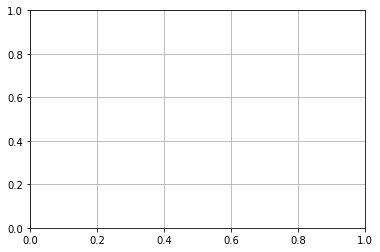

Minima found at x = -5.056062898101513, y = 2.0031430485435404


In [39]:
# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Quadratic Fit Search for Unimodal Function')

# Add legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print the final result
print(f"Minima found at x = {min_x_fit}, y = {my_fun(min_x_fit)}")